In [1]:
%run ../../bin/imports.ipynb
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Plotting the baseline cell line HLA LOH coverages

CRL-2314: /rnd/symphony/symops/7029/183291/16191165/PIPELINE/Cancer_DNA_1276312/Dash <br>
CRL-5922: /rnd/symphony/symops/7029/183302/16192191/PIPELINE/Cancer_DNA_1276488/Dash <br>
CRL-5911 (H2009): /rnd/users/rpyke/data/00-DASH/output/pipeline_cell_line_db_00/DNA_VVV_S15_P10_9

In [3]:
green = '#77c722'
blue = '#3864b5'

In [4]:
output_dir = '/rnd/users/rpyke/data/00-DASH/figures'

In [5]:
def plot_results(df, all_positions_df, gene, sample_name, allele1, allele2):
    plt.figure(figsize=(6, 3.75))
    sns.set_context('paper', font_scale=0.9)
    plt.subplot(4, 1, 1)
    all_positions_df.coverage_normal_1.plot(color=green)
    all_positions_df.coverage_normal_2.plot(color=blue)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.xlim(0, len(all_positions_df))
    plt.ylabel('Normal\ncoverage')
    plt.title('{0} - gene: {1}'.format(sample_name, gene))
    
    for mismatch in df.Mismatch_positions_1:
        plt.axvline(mismatch, color='k', alpha=0.2)

    plt.subplot(4, 1, 2)
    all_positions_df.coverage_tumor_1.plot(color=green)
    all_positions_df.coverage_tumor_2.plot(color=blue)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.xlim(0, len(all_positions_df))
    plt.ylabel('Tumor\ncoverage')

    for mismatch in df.Mismatch_positions_1:
        plt.axvline(mismatch, color='k', alpha=0.2)

    plt.subplot(4, 1, 3)

    #plt.scatter(df.Mismatch_positions_1, 1 - df.BAF, color='black')
    #plt.scatter(df.Mismatch_positions_1, 1 - df.BAF_normal, color='darkgrey')
    plt.scatter(df.Mismatch_positions_1, df.BAF, color='black', s=2)
    plt.scatter(df.Mismatch_positions_1, df.BAF_normal, color='darkgrey', s=2)
    plt.legend(['Tumor', 'Normal'],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.axhline(0.5, color='grey', linestyle='--')
    plt.xlim(0, len(all_positions_df))
    plt.ylim(0, 1)
    plt.ylabel('B-allele\nfrequency')

    plt.subplot(4, 1, 4)
    plt.scatter(df.Alignment_mismatch, df.R1, color=green, s=2)
    plt.scatter(df.Alignment_mismatch, df.R2, color=blue, s=2)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.axhline(1, color='grey', linestyle='--')
    plt.xlim(0, len(all_positions_df))
    plt.ylim(0, 3)
    plt.ylabel('T/N\ncoverage\nratio')
    plt.xlabel('Genomic position')

    #plt.show()
    #plt.savefig('/rnd/users/rpyke/data/00-DASH/for_others/DNA_INOVA_054B_C.gene_A.pdf')
    
    plt.savefig('{0}/Mannual_annotation.{1}.{2}.pdf'.format(output_dir, sample_name, gene),
                bbox_inches='tight')
    plt.show()

In [6]:
cell_line_path_dict = {'CRL-2314': '/rnd/symphony/symops/7029/183291/16191165/PIPELINE/Cancer_DNA_1276312/Dash',
                       'CRL-5922': '/rnd/symphony/symops/7029/183302/16192191/PIPELINE/Cancer_DNA_1276488/Dash',
                       'CRL-5911': '/rnd/users/rpyke/data/00-DASH/output/pipeline_cell_line_db_00/DNA_VVV_S15_P10_9'}

CRL-2314 A


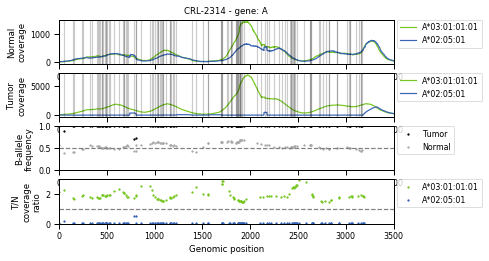

CRL-2314 B


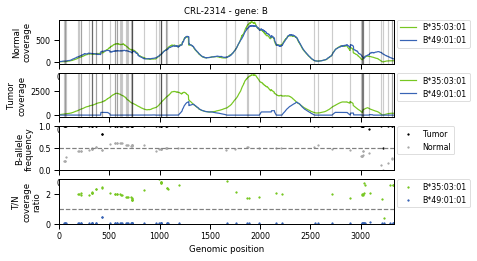

CRL-2314 C


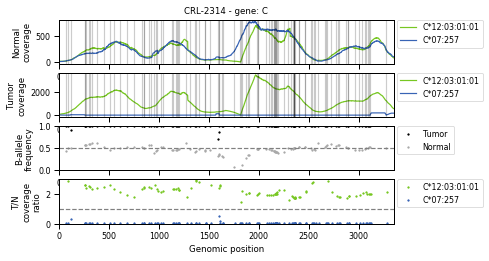

CRL-5922 A
Homozygous
CRL-5922 B


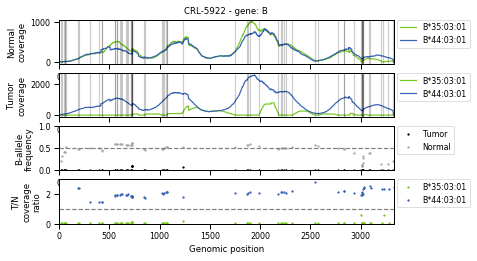

CRL-5922 C


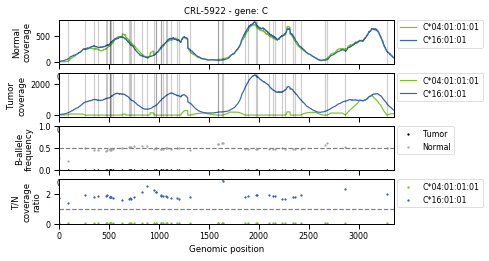

CRL-5911 A
Homozygous
CRL-5911 B


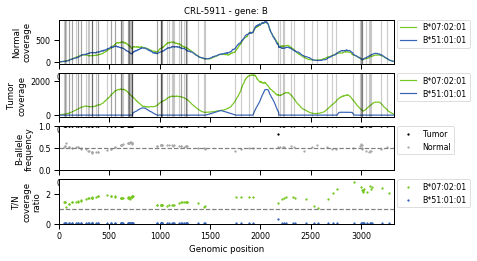

CRL-5911 C


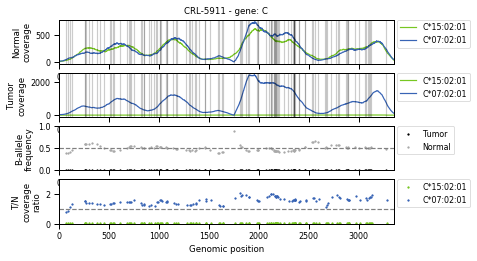

In [7]:
for cell_line in cell_line_path_dict.keys():
    for gene in ['A', 'B', 'C']:
        
        print(cell_line, gene)
        
        path_ffn = cell_line_path_dict[cell_line]
        dash_output_df = pd.read_csv('{0}/DASH.output.txt'.format(path_ffn), '\t')
        alleles = list(dash_output_df[dash_output_df.hla_locus == gene].hla_assign_allele)
        
        allele1 = alleles[0]
        allele2 = alleles[1]
        sample_name = cell_line
        
        if list(dash_output_df[dash_output_df.hla_locus == gene].alternate_copy_number)[0] != '-':

            df = pd.read_csv('{0}/DASH.mismatches_{1}.csv'.format(path_ffn, gene))
            all_positions_df = pd.read_csv('{0}/DASH.all_positions_{1}.csv'.format(path_ffn, gene))
            plot_results(df, all_positions_df, gene, sample_name, allele1, allele2)

        else:
            
            print('Homozygous')